In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(filepath_or_buffer="D:\sentimental_analysis\code1\GetOldTweets-python\output_got.csv", sep=';')

In [6]:
df.head()

username              date  retweets  favorites  \
0   mayavarathaan  2018-03-18 07:30        73        103   
1    Coimbatoraan  2018-03-17 20:37         2          1   
2  Truethoughts68  2018-03-17 20:15         2          6   
3   Ganesh_Sabari  2018-03-16 13:24         0          0   
4       Mrbublooo  2018-03-13 17:15         6          1   

                                                text  geo          mentions  \
0  ஊரே ஒட்டு மொத்தமா #ChennaiFloods #CuddaloreFlo...  NaN  @karupalaniappan   
1  கூடிய சீக்கிரம் சட்டையக் கிழிச்சுட்டு சுத்தும்...  NaN               NaN   
2  #ChennaiFloods India came together along with ...  NaN               NaN   
3  cc #ChennaiFloods #chennairainshelp #Cuddalore...  NaN               NaN   
4  These CTC members saved and helped ppl during ...  NaN               NaN   

                                            hashtags                  id  \
0                    #ChennaiFloods #CuddaloreFloods  975190251604926464   
1  #chennaiFloods #sunnyLeon #AIADMK #2Point0 #13...  975025723709640704   
2  #ChennaiFloods #TheniForestFire #ChennaiSuperK...  975020336633675776   
3  #ChennaiFloods #chennairainshelp #CuddaloreFlo...  974554397882564608   
4                                     #chennaifloods  973525344845049857   

                                           permalink  
0  https://twitter.com/mayavarathaan/status/97519...  
1  https://twitter.com/Coimbatoraan/status/975025...  
2  https://twitter.com/Truethoughts68/status/9750...  
3  https://twitter.com/Ganesh_Sabari/status/97455...  
4  https://twitter.com/Mrbublooo/status/973525344...

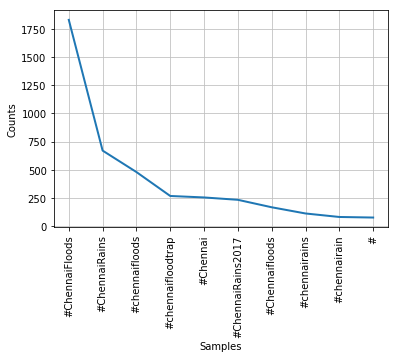

In [7]:
from nltk import FreqDist
hashtags = []
for hs in df["hashtags"]: # Each entry may contain multiple hashtags. Split.
       hashtags += hs.split(" ")
fdist1 = FreqDist(hashtags)
fdist1.plot(10)

In [8]:
# Top 10 users

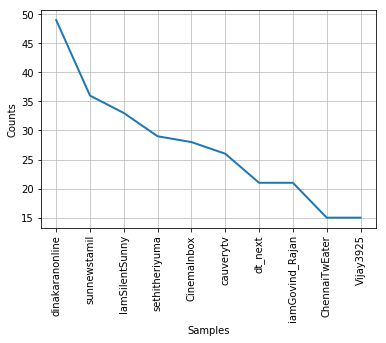

In [9]:
users = df["username"].tolist()
fdist2 = FreqDist(users)
fdist2.plot(10)

In [10]:
# Text Pre-processing

In [12]:
import nltk
nltk.download()
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import re, string
from nltk.stem.snowball import SnowballStemmer


tweets_texts = df["text"].tolist()
stopwords=stopwords.words('english')
english_vocab = set(w.lower() for w in nltk.corpus.words.words())
stemmer = SnowballStemmer("english", ignore_stopwords=True)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [11]:
stopwords

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u"you're",
 u"you've",
 u"you'll",
 u"you'd",
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u"she's",
 u'her',
 u'hers',
 u'herself',
 u'it',
 u"it's",
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u"that'll",
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',
 u'being',
 u'have',
 u'has',
 u'had',
 u'having',
 u'do',
 u'does',
 u'did',
 u'doing',
 u'a',
 u'an',
 u'the',
 u'and',
 u'but',
 u'if',
 u'or',
 u'because',
 u'as',
 u'until',
 u'while',
 u'of',
 u'at',
 u'by',
 u'for',
 u'with',
 u'about',
 u'against',
 u'between',
 u'into',
 u'through',
 u'during',
 u'before',
 u'after',
 u'above',
 u'below',
 u'to',
 u'from',
 u'up',
 u'down',
 u'in',
 u'out',
 u'on',
 u'off',
 u'over',
 u'under',
 u'again',
 u'further',
 u'th

In [12]:
english_vocab

{u'tripolitan',
 u'sicsac',
 u'clotter',
 u'leucosyenite',
 u'supersensuous',
 u'nunnery',
 u'unessence',
 u'chilitis',
 u'fabianist',
 u'pawnor',
 u'epigastrocele',
 u'alible',
 u'preadjournment',
 u'neosorex',
 u'sperrylite',
 u'cardiospermum',
 u'spidery',
 u'regularize',
 u'caner',
 u'fibrillose',
 u'mooder',
 u'fertileness',
 u'demonolatrously',
 u'epizoicide',
 u'lexiconist',
 u'sarcoplastic',
 u'reclear',
 u'humistratous',
 u'optophone',
 u'pediferous',
 u'reclean',
 u'unfeelable',
 u'controlless',
 u'purulently',
 u'interdependable',
 u'canel',
 u'rumbustious',
 u'osteoblastic',
 u'heliothis',
 u'merogonic',
 u'malguzar',
 u'naturopathic',
 u'stymphalides',
 u'vasopressor',
 u'replacer',
 u'concutient',
 u'pigment',
 u'pursuantly',
 u'croakiness',
 u'monamniotic',
 u'hydrolyzate',
 u'panornithic',
 u'vaginolabial',
 u'screaming',
 u'loricariidae',
 u'spearproof',
 u'aporocactus',
 u'guavina',
 u'lithiasis',
 u'grueling',
 u'amirship',
 u'electragist',
 u'discouragingness',
 u'i

In [13]:
def process_tweet_text(tweet):
   if tweet.startswith('@null'):
       return "[Tweet not available]"
   tweet = re.sub(r'\d+', '', tweet)
   tweet = re.sub(r'\$\w*','',tweet) # Remove tickers
   
   tweet = re.sub(r'https?:\/\/.*\/\w*','',tweet) # Remove hyperlinks
   
   tweet = re.sub(r'['+string.punctuation+']+', ' ',tweet) # Remove puncutations like 's
   
   twtok = TweetTokenizer(strip_handles=True, reduce_len=True)
   tokens = twtok.tokenize(tweet)
   
   tokens = [i.lower() for i in tokens if i not in stopwords and len(i) > 2 and  
                                            i in english_vocab]
   return tokens

In [14]:
 words = []
 for tw in tweets_texts:
      words += process_tweet_text(tw)
 print words

[u'pic', u'twitter', u'came', u'together', u'along', u'armed', u'immediately', u'corrupt', u'like', u'talking', u'next', u'saved', u'government', u'silent', u'busy', u'amma', u'stickers', u'met', u'beach', u'cleanup', u'reliable', u'trek', u'leader', u'several', u'social', u'several', u'beach', u'pic', u'twitter', u'much', u'would', u'user', u'trust', u'american', u'saved', u'mean', u'arms', u'race', u'business', u'non', u'coverage', u'elect', u'stand', u'next', u'toilet', u'moment', u'health', u'faucet', u'coupling', u'impossible', u'new', u'climate', u'change', u'color', u'meteorite', u'strike', u'like', u'covered', u'days', u'national', u'media', u'capable', u'maximum', u'rain', u'water', u'summer', u'neet', u'well', u'tamil', u'india', u'mapper', u'mobile', u'ever', u'see', u'bad', u'every', u'good', u'far', u'behind', u'even', u'height', u'inappropriate', u'help', u'people', u'ask', u'humanity', u'relief', u'material', u'around', u'flood', u'affected', u'also', u'money', u'bought'

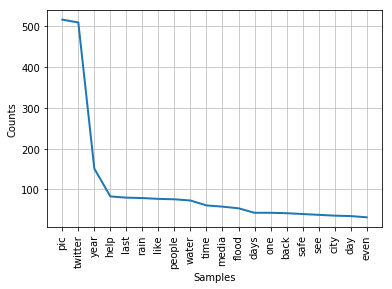

In [15]:
fdist2 = FreqDist(words)
fdist2.plot(20)

In [16]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [17]:
finder = BigramCollocationFinder.from_words(words, 5)
finder.apply_freq_filter(5)
print(finder.nbest(bigram_measures.likelihood_ratio, 10))

[(u'pic', u'twitter'), (u'storm', u'storm'), (u'last', u'year'), (u'twitter', u'pic'), (u'warning', u'system'), (u'working', u'fire'), (u'shut', u'positive'), (u'social', u'media'), (u'positive', u'information'), (u'positive', u'right')]


In [18]:
# Before using the Vectorizer

In [19]:
cleaned_tweets = []
for tw in tweets_texts:
    words = process_tweet_text(tw)
    cleaned_tweet = " ".join(w for w in words if len(w) > 2 and 
w.isalpha()) #Form sentences of processed words
    cleaned_tweets.append(cleaned_tweet)
df['CleanTweetText'] = cleaned_tweets

In [20]:
df['CleanTweetText']


0                                             pic twitter
1                                                        
2       came together along armed immediately corrupt ...
3                                                        
4              saved government silent busy amma stickers
5       met beach cleanup reliable trek leader several...
6                                                        
7       much would user trust american saved mean arms...
8       non coverage elect stand next toilet moment he...
9       impossible new climate change color meteorite ...
10                                                       
11                                                       
12                       like covered days national media
13                                                       
14                                                       
15                      capable maximum rain water summer
16                                  neet well tamil india
17            

In [21]:
# Vectorization is done using 1-3 n-grams,
# meaning phrases with 1,2,3 words are used to compute frequencies, i.e. TF IDF values. 
# One can get cosine similarity amongst tweets/documents as well.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer  

tfidf_vectorizer = TfidfVectorizer(use_idf=True, ngram_range=(1,3)) 

tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_tweets)  
print tfidf_matrix


  (0, 5994)	0.575316655335
  (0, 8869)	0.578364394692
  (0, 6001)	0.578364394692
  (2, 973)	0.162257657901
  (2, 8617)	0.150292157473
  (2, 222)	0.193443146864
  (2, 435)	0.218010016667
  (2, 3902)	0.193443146864
  (2, 1510)	0.218010016667
  (2, 4464)	0.121931512176
  (2, 8294)	0.207139003599
  (2, 5460)	0.159099751354
  (2, 985)	0.18084177749
  (2, 8618)	0.218010016667
  (2, 223)	0.218010016667
  (2, 436)	0.218010016667
  (2, 3903)	0.218010016667
  (2, 1511)	0.218010016667
  (2, 4529)	0.218010016667
  (2, 8296)	0.218010016667
  (2, 986)	0.218010016667
  (2, 8619)	0.218010016667
  (2, 224)	0.218010016667
  (2, 437)	0.218010016667
  (2, 3904)	0.218010016667
  :	:
  (2497, 4440)	0.351876103708
  (2497, 8851)	0.401313039056
  (2497, 8855)	0.438710636959
  (2497, 4441)	0.438710636959
  (2497, 8856)	0.438710636959
  (2498, 545)	0.170621919466
  (2498, 5315)	0.391016333771
  (2498, 3126)	0.226242619091
  (2498, 5325)	0.230721562359
  (2498, 4706)	0.209957594873
  (2498, 3293)	0.272742050225


In [23]:
feature_names = tfidf_vectorizer.get_feature_names() # num phrases  
print feature_names

[u'abandoned', u'abandoned place', u'abandoned place near', u'abiding', u'abiding memory', u'abiding memory kindness', u'ability', u'ability function', u'ability function even', u'able', u'able anybody', u'able anybody needs', u'able cook', u'able cook nearly', u'able home', u'able home pic', u'able raise', u'able raise money', u'able withstand', u'able withstand huge', u'able withstand natural', u'abundant', u'abundant fresh', u'abundant fresh water', u'abuse', u'abuse epic', u'abuse epic video', u'abuser', u'abuser rule', u'abuser rule natural', u'accept', u'accept ail', u'accept ail state', u'accommodation', u'accommodation pic', u'accommodation pic twitter', u'accordingly', u'accountability', u'accountability process', u'accountability process established', u'accountable', u'accountable like', u'accountable like happen', u'accused', u'accused funds', u'accused funds use', u'across', u'across alert', u'across alert safe', u'across insurance', u'across insurance banking', u'across pa

In [24]:
from sklearn.metrics.pairwise import cosine_similarity  
dist = 1 - cosine_similarity(tfidf_matrix)  
print(dist) 

[[  0.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   0.00000000e+00 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 ..., 
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,  -2.22044605e-16
    1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
   -2.22044605e-16   1.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
    1.00000000e+00  -2.22044605e-16]]


In [25]:
from sklearn.cluster import KMeans  
num_clusters = 3  
km = KMeans(n_clusters=num_clusters)  
km.fit(tfidf_matrix)  
clusters = km.labels_.tolist()  
df['ClusterID'] = clusters  
print(df['ClusterID'].value_counts())

1    2190
2     241
0      69
Name: ClusterID, dtype: int64


In [26]:
# The top words used in each cluster can be computed by as follows:



In [27]:
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster {} : Words :".format(i))
    for ind in order_centroids[i, :10]: 
        print(' %s' % feature_names[ind])

Cluster 0 : Words :
 storm
 help
 jinx
 give right
 right information
 shut stop
 shut stop positive
 stop positive
 give right information
 stop positive give
Cluster 1 : Words :
 pic
 twitter
 pic twitter
 year
 rain
 last
 people
 like
 water
 help
Cluster 2 : Words :
 twitter
 pic twitter
 pic
 zero control flooded
 glance
 glimpse
 glass left drink
 glass left
 glass
 glance newspaper feel


In [28]:
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string


In [29]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized
texts = [text for text in cleaned_tweets if len(text) > 2]
doc_clean = [clean(doc).split() for doc in texts]
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
ldamodel = models.ldamodel.LdaModel(doc_term_matrix, num_topics=6, id2word = 
dictionary, passes=5)
for topic in ldamodel.show_topics(num_topics=6, formatted=False, num_words=6):
    print("Topic {}: Words: ".format(topic[0]))
    topicwords = [w for (w, val) in topic[1]]
    print(topicwords)

Topic 0: Words: 
[u'year', u'last', u'like', u'flood', u'give', u'even']
Topic 1: Words: 
[u'medium', u'pic', u'twitter', u'jinx', u'source', u'rain']
Topic 2: Words: 
[u'people', u'work', u'medium', u'social', u'time', u'disaster']
Topic 3: Words: 
[u'pic', u'twitter', u'rain', u'time', u'people', u'help']
Topic 4: Words: 
[u'year', u'pic', u'twitter', u'water', u'storm', u'city']
Topic 5: Words: 
[u'pic', u'day', u'twitter', u'help', u'safe', u'see']
